In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [4]:
#Method to format AmountInUSD column values
def convertAmounts(amt):
    if amt != np.nan:
        amt = amt.replace(',','')
        if len(amt) > 0:
            return float(amt)
        else:
            return 0
    return 0

In [5]:
#Read input csv file
df = pd.read_csv('../input/startup_funding.csv',converters={'AmountInUSD':convertAmounts})

In [6]:
#Check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         2372 non-null float64
Remarks             419 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 185.4+ KB


In [7]:
#Check head of dataset
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0.0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


In [8]:
#AmountInUSD has some null values. Replace null values with mean
mean_of_amount = int(np.mean(df['AmountInUSD']))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x:mean_of_amount if x == 0 else x )

In [9]:
#Replace . with / and // with / of the date values so that it would be easy to extract year
df['Date'] = df['Date'].apply(lambda dt:dt.replace(".","/"))
df['Date'] = df['Date'].apply(lambda dt:dt.replace("//","/"))
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['year'] = df['Date'].apply(lambda dt:dt.year)

In [10]:
#Check whether new column is added 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 11 columns):
SNo                 2372 non-null int64
Date                2372 non-null datetime64[ns]
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         2372 non-null float64
Remarks             419 non-null object
year                2372 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 203.9+ KB


In [11]:
#The dataset has data for three years only
df['year'].value_counts()

2016    993
2015    936
2017    443
Name: year, dtype: int64

In [12]:
#Check head of dataset
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,year
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,2017
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,7734985.0,NaN,2017
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,7734985.0,NaN,2017
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017


In [13]:
#Get count of startups which received funding group by year
by_year_cmp = df[['StartupName','year']].groupby(by='year').count()

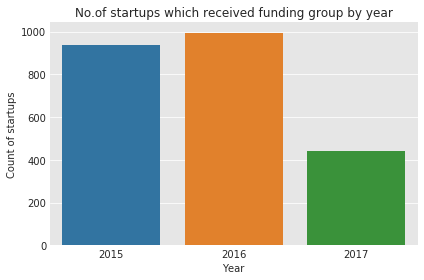

In [14]:
#Plot no.of companies which received funding groupby year
sns.barplot(x='year',y='StartupName',data=by_year_cmp.reset_index())
plt.title('No.of startups which received funding group by year')
plt.xlabel('Year')
plt.ylabel('Count of startups')
plt.tight_layout()

2016 was the year when most startups received funding

In [15]:
#Calculate the mean of funding amount group by year
by_year = df.groupby(by='year')['AmountInUSD'].mean().astype('int64')

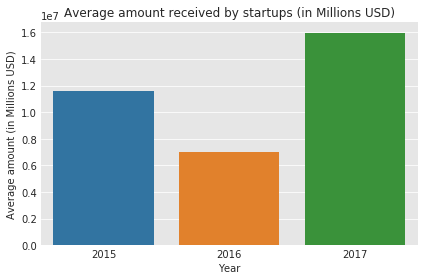

In [16]:
#The dataset has data for three years only. Hence, creating a list for the available years
years = ['2015','2016','2017']

#Plot average funding amount group by year
sns.barplot(x=years,y=by_year.values)
plt.xlabel('Year')
plt.ylabel('Average amount (in Millions USD)')
plt.title('Average amount received by startups (in Millions USD)')
plt.tight_layout()

Though only few startups received funding in 2017 but the average amount was highest

In [17]:
#Drop NA values from industry verticals
#Convert all available values to uppercase so that it would be easy to retrieve unique records
df['IndustryVertical'] = df['IndustryVertical'].dropna()
industries_vertical = df['IndustryVertical'].apply(lambda iv:str(iv).upper())
#Create new numpy arrays to store industries which received funding and its respective counts
industries = industries_vertical.dropna().unique()[:10]
industries_count = industries_vertical.value_counts()[:10]

Text(0.5,1,'Top 5 industry verticals which received most funding')

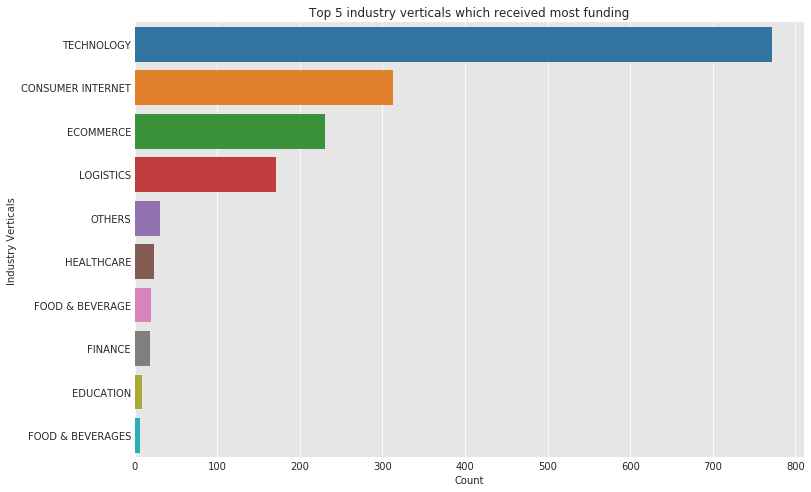

In [18]:
#Plot industry verticals and count
plt.figure(figsize=(12,8))
sns.barplot(x=industries_count, y=industries,)
#plt.xticks(rotation=45)
plt.ylabel('Industry Verticals')
plt.xlabel('Count')
plt.title('Top 5 industry verticals which received most funding')
#plt.tight_layout()

Technology startups received most of the funds

In [19]:
#Drop NA values from investor names and convert the values to upper case
df['InvestorsName'] = df['InvestorsName'].dropna()
investors = df['InvestorsName'].apply(lambda iv:str(iv).upper())
investors_count = investors.value_counts()[:10]
investors = investors.dropna().unique()[:10]

Text(0.5,1,'Top 10 Investors and the count of companies')

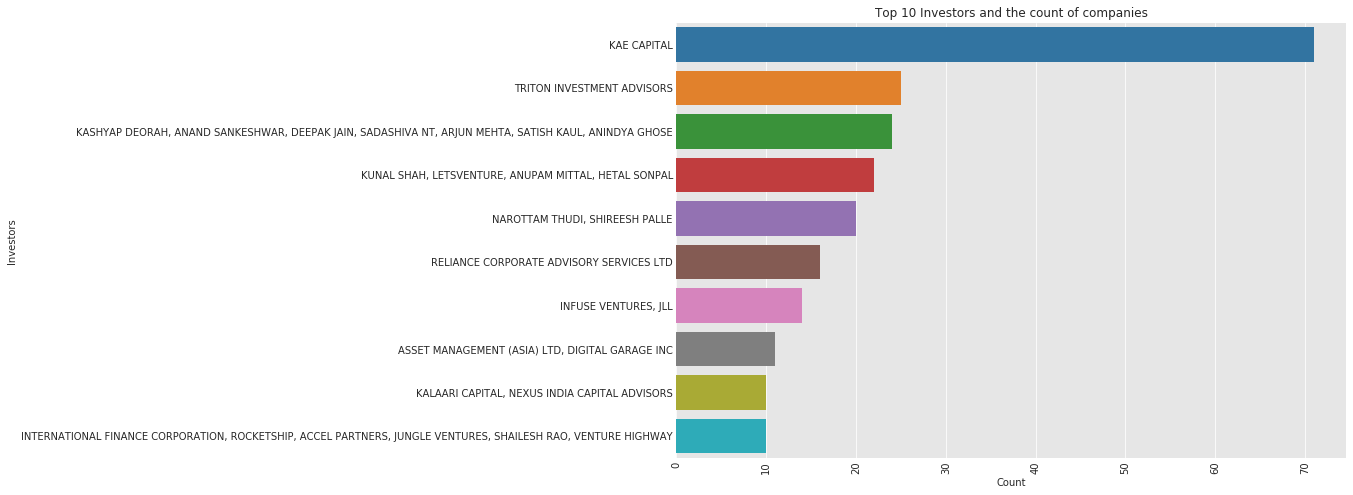

In [20]:
#Plot investor names and count
plt.figure(figsize=(12,8))
sns.barplot(y=investors,x=investors_count)
plt.xticks(rotation=90)
plt.ylabel('Investors')
plt.xlabel('Count')
plt.title('Top 10 Investors and the count of companies')

KAE capital has invested in highest number of startups

In [21]:
#Create a new dataframe which holds investors and amount
by_investors_df = df[['InvestorsName','AmountInUSD']]
#Convert investor names to uppercase
by_investors_df['InvestorsName'] = by_investors_df['InvestorsName'].apply(lambda iv:str(iv).upper())
#Group by investornames and retrieve the sum of amounts
by_investors = by_investors_df.groupby(by='InvestorsName').sum().astype('int64')
#Sort the calculates sum in descending order
by_investors.sort_values(by='AmountInUSD',ascending=False,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Top 10 Investors and the average amount invested')

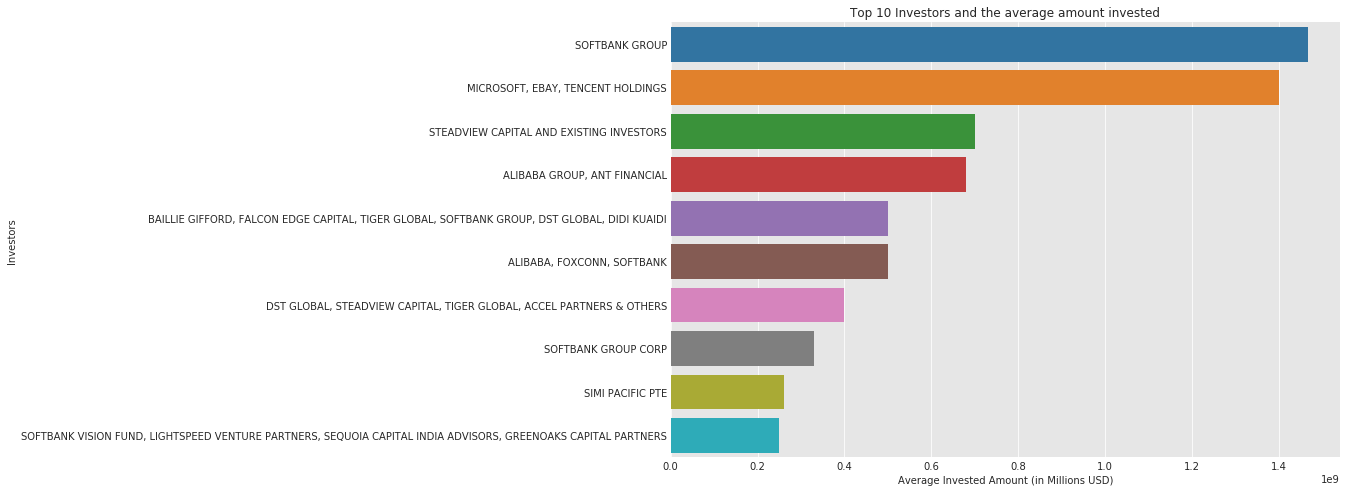

In [22]:
#Plot top-10 investors and corresponding invested amount
top_investors_name = by_investors.reset_index()[:10]['InvestorsName']
top_invested_amount = by_investors.reset_index()[:10]['AmountInUSD']
plt.figure(figsize=(12,8))
sns.barplot(y=top_investors_name,x=top_invested_amount)
plt.ylabel('Investors')
plt.xlabel('Average Invested Amount (in Millions USD)')
plt.title('Top 10 Investors and the average amount invested')

SoftBank has the highest invested amount

In [23]:
#As per data there are different values for OLA and Flipkart.
#Standardize them so that it will be easy to group them
df['StartupName'] = df['StartupName'].apply(lambda x:x[0:3] if x.replace(' ','').lower() == 'olacabs' else x)
df['StartupName'] = df['StartupName'].apply(lambda x:x[0:x.index('.')] if x == 'Flipkart.com' else x)
#df['StartupName'] = df['StartupName'].apply(lambda x:x[0:3] if x == 'Olacabs' else x)

In [24]:
#Create a new dataframe which holds startups and amount
top_companies_df = df[['StartupName','AmountInUSD']]
#Convert startup names to uppercase
top_companies_df['StartupName'] = top_companies_df['StartupName'].apply(lambda iv:str(iv).upper())
#Group by startupname and retrieve the sum of amounts
top_companies = top_companies_df.groupby(by='StartupName').sum().astype('int64')
#Sort the calculates sum in descending order
top_companies.sort_values(by='AmountInUSD',ascending=False,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Top 10 Companies and average amount received')

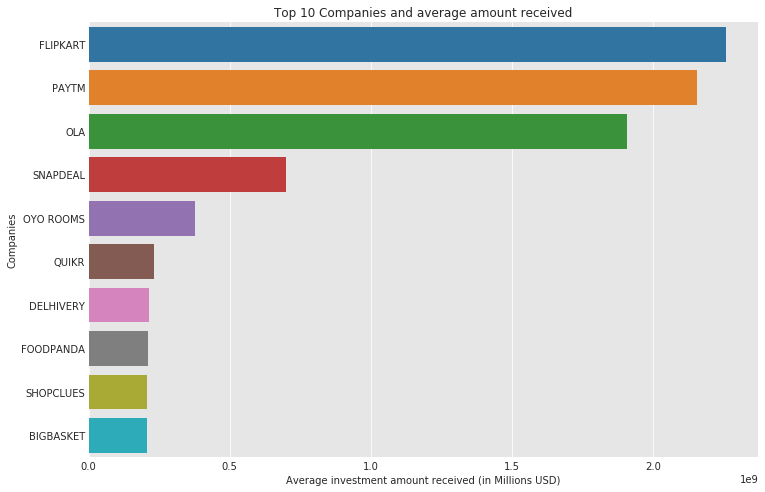

In [25]:
#Plot the top-10 startups which received highest funding
top_companies_name = top_companies.reset_index()[:10]['StartupName']
top_companies_amount = top_companies.reset_index()[:10]['AmountInUSD']
plt.figure(figsize=(12,8))
sns.barplot(y=top_companies_name,x=top_companies_amount)
plt.ylabel('Companies')
plt.xlabel('Average investment amount received (in Millions USD)')
plt.title('Top 10 Companies and average amount received')

Flipkart has received highest funding amount

In [26]:
#Function to take care of cities which has / in them. Ex: Bangalor / California.....
def format_cities(city):
    city = city.replace(" ","")
    if "/" in city:
        print(city)
        print(city[0:city.index("/")].upper())
        return city[0:city.index("/")].upper()
    else:
        return city.upper()

In [27]:
#Somehow nan values in dataset are stored as float datatype. convert them to np.nan so that
#it would be easy to remove them
df['CityLocation'] = df['CityLocation'].apply(lambda x:np.nan if str(x) == 'nan' else x)

#Now drop nan values easily
df['CityLocation'] = df['CityLocation'].dropna()

In [28]:
#Create a new dataframe which holds Cities and amount
top_cities_df = df[['CityLocation','AmountInUSD']]
#Group by startupname and retrieve the sum of amounts
top_cities = top_cities_df.groupby(by='CityLocation').sum().astype('int64')
#Sort the calculates sum in descending order
top_cities.sort_values(by='AmountInUSD',ascending=False,inplace=True)

Text(0.5,1,'Top 10 Cities and average amount received')

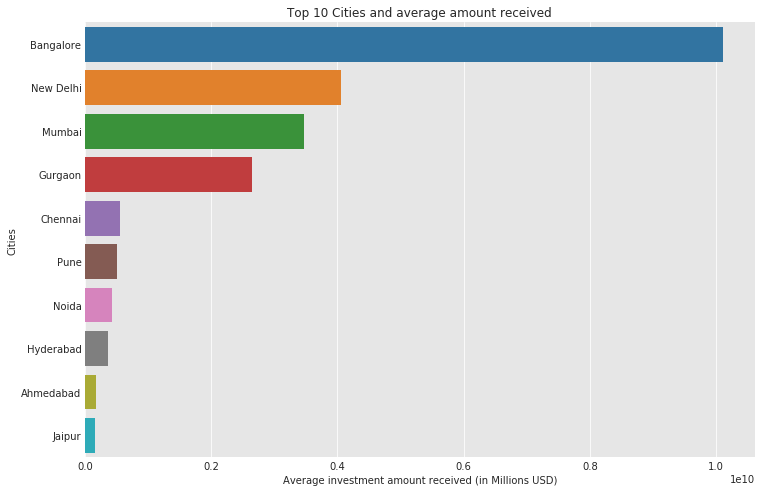

In [29]:
#Plot city and amount
top_cities_name = top_cities.reset_index()[:10]['CityLocation']
top_cities_amount = top_cities.reset_index()[:10]['AmountInUSD']
plt.figure(figsize=(12,8))
sns.barplot(y=top_cities_name,x=top_cities_amount)
plt.ylabel('Cities')
plt.xlabel('Average investment amount received (in Millions USD)')
plt.title('Top 10 Cities and average amount received')

Startups in Bangalore have received highest funding amount